In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

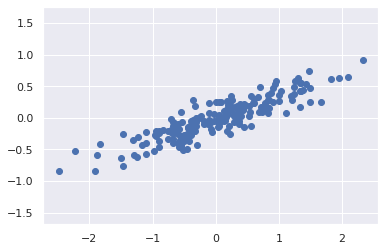

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [6]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)
    
    plt.axis('equal')

RecursionError: maximum recursion depth exceeded in comparison

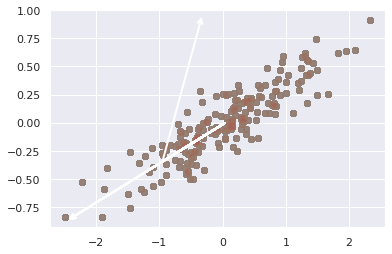

In [9]:
draw_vector(pca.components_[0], pca.components_[1])

In [10]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [11]:
X_pca = pca.transform(X)

In [12]:
X.shape

(200, 2)

In [13]:
X_pca.shape

(200, 1)

In [14]:
X_new = pca.inverse_transform(X_pca)

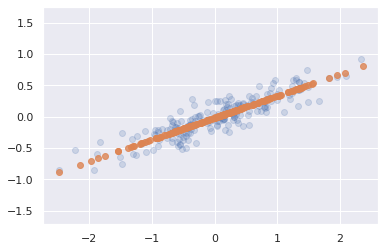

In [15]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.show()